<a href="https://colab.research.google.com/github/DeepthiManthapuram/MachineLearning-Algorithms/blob/main/DTtitanic_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree

In [31]:
df = sns.load_dataset('titanic')

In [4]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [29]:
print(df is None)
print(type(df))


True
<class 'NoneType'>


In [36]:
df['age'] = df['age'].fillna(df['age'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [11]:
df.duplicated().sum()

np.int64(1)

In [33]:
df.drop_duplicates()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [34]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [53]:
df = pd.get_dummies(df, drop_first=True)


In [54]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['embarked'] = le.fit_transform(df['embarked'])


In [55]:
x = df.drop(columns=['survived'])
y = df['survived']

In [56]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)


In [57]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [76]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(
    criterion = "gini",
    max_depth = 4,
    random_state = 42
)
classifier.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [66]:
y_pred = classifier.predict(x_test)

In [67]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[105   0]
 [  0  74]]


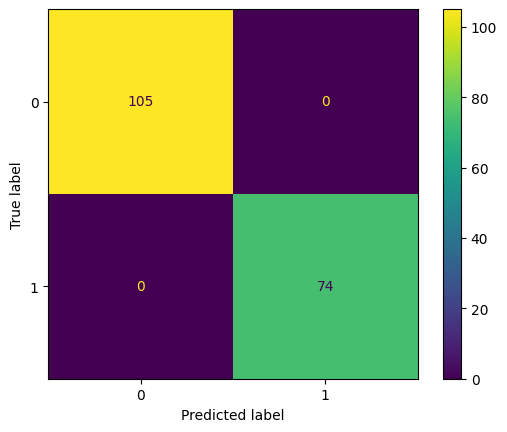

In [69]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [86]:
feature_names = x.columns

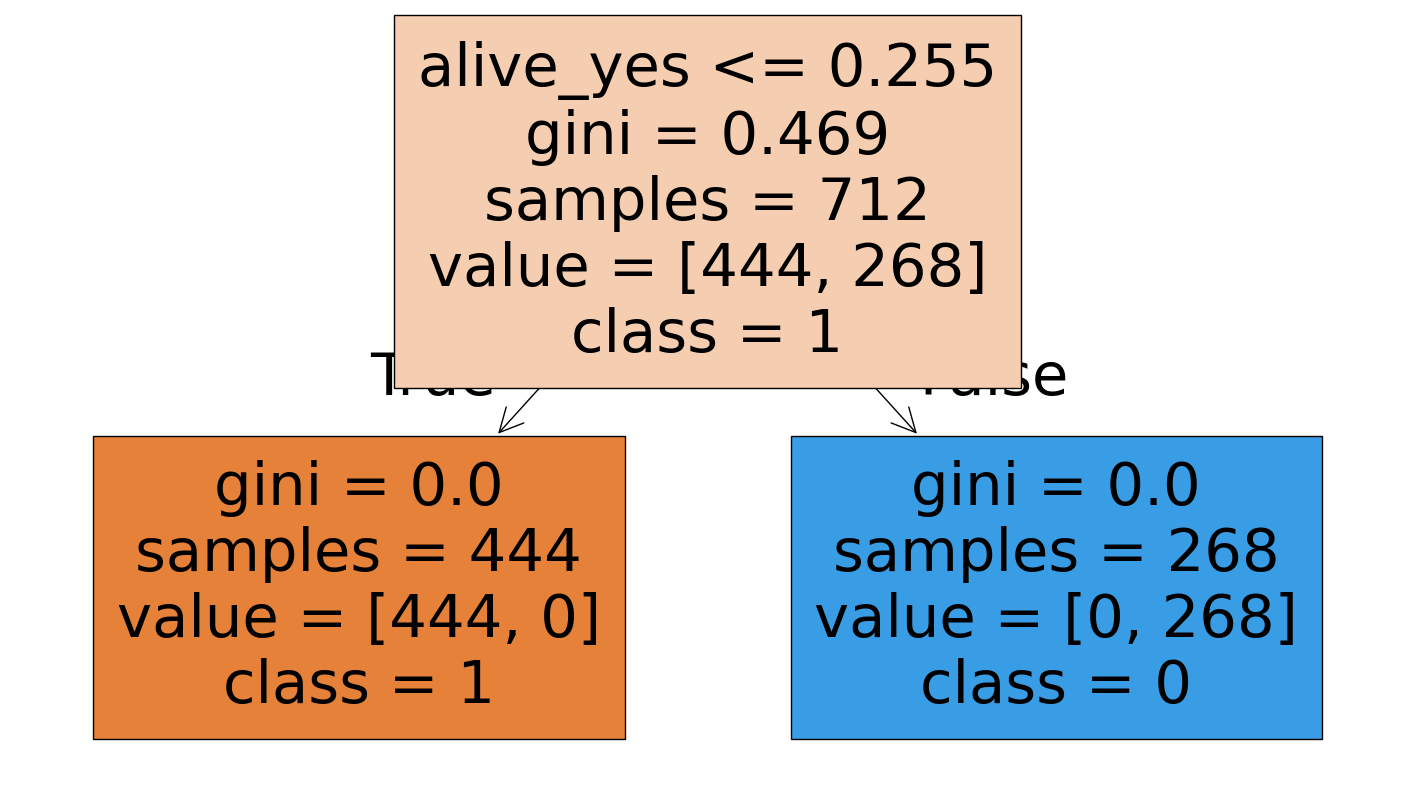

In [89]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(18,10))
plot_tree(
    classifier,
    feature_names=feature_names,
    class_names=["1", "0"],
    filled=True
)
plt.show()


In [85]:
new_passenger=pd.DataFrame([[3,11,25,71,21]],columns=x.columns)
prediction=classifier.predict(new_passenger)
prediction


ValueError: 22 columns passed, passed data had 5 columns

In [82]:
if prediction[0]==1:
  print("passenger is likely to survive")
else:
  print("passenger is likely to not survive")

NameError: name 'prediction' is not defined